/var/folders/md/x5qxp0k97mbfgpkqrrf2rhtc0000gn/T/ipykernel_8753/2139914068.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_plot['violent_crime_2018-2022'] = pd.to_numeric(data_for_plot['violent_crime_2018-2022'], errors='coerce')


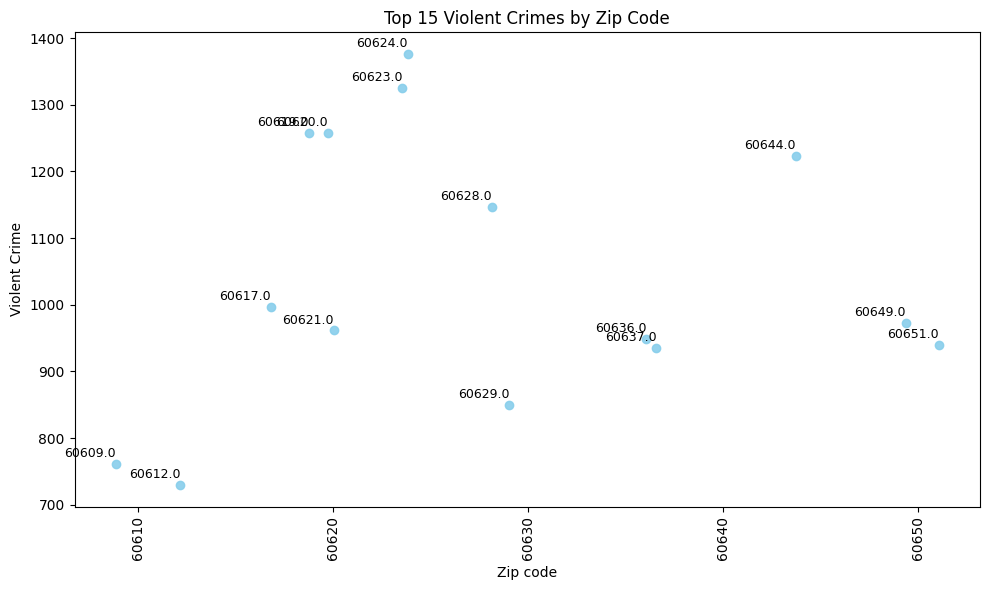

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from the Excel file
file_path = 'zip_code_stats.xlsx'
df = pd.read_excel(file_path)

# Extract relevant columns for the scatter plot
data_for_plot = df[['Name', 'violent_crime_2018-2022']]

data_for_plot['violent_crime_2018-2022'] = pd.to_numeric(data_for_plot['violent_crime_2018-2022'], errors='coerce')


# Sort the DataFrame by 'violent_crime_2018-2022' in descending order and select the top 15 rows
top_15_data = data_for_plot.sort_values(by='violent_crime_2018-2022', ascending=False).head(15)

# Introduce jitter to x-axis values
jitter = np.random.normal(0, 0.4, len(top_15_data))
top_15_data['Name_jittered'] = top_15_data['Name'] + jitter

# Plotting with transparency and jittering
plt.figure(figsize=(10, 6))
plt.scatter(top_15_data['Name_jittered'], top_15_data['violent_crime_2018-2022'], color='skyblue', alpha=0.9)

# Annotate each point with the corresponding 'Name'
for i, row in top_15_data.iterrows():
    plt.annotate(row['Name'], (row['Name_jittered'], row['violent_crime_2018-2022']), textcoords="offset points", xytext=(0,5), ha='right', fontsize=9)

plt.xlabel('Zip code')
plt.ylabel('Violent Crime')
plt.title('Top 15 Violent Crimes by Zip Code')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


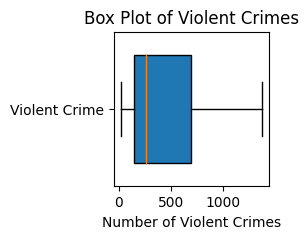

count      58.000000
mean      433.599680
std       400.937042
min        19.375279
25%       146.836521
50%       265.795190
75%       692.941968
max      1376.367880
Name: violent_crime_2018-2022, dtype: float64


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the Excel file
file_path = 'zip_code_stats.xlsx'
df = pd.read_excel(file_path)

# Extract relevant columns for the box plot
data_for_boxplot = df['violent_crime_2018-2022']

# Convert 'violent_crime_2018-2022' column to numeric (remove commas)
data_for_boxplot = pd.to_numeric(data_for_boxplot, errors='coerce')

# Calculate the five-number summary
summary_stats = data_for_boxplot.describe()

# Plotting the box plot
plt.figure(figsize=(2, 2))
box = plt.boxplot(data_for_boxplot, vert=False, widths=0.7, patch_artist=True, labels=['Violent Crime'])
plt.xlabel('Number of Violent Crimes')
plt.title('Box Plot of Violent Crimes')
plt.show()
print(summary_stats)
